In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
df = pd.read_excel('/content/drive/My Drive/monthly_data_total.xlsx')

In [5]:
df.head()

,Date,Import,Export
0,2006-01-01,12519.71,9143.66
1,2006-02-01,11479.69,8993.29
2,2006-03-01,14314.02,11560.97
3,2006-04-01,12924.18,8624.66
4,2006-05-01,15105.67,10109.30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
Date      165 non-null datetime64[ns]
Import    165 non-null float64
Export    165 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.0 KB


In [0]:
df.index = df.Date

In [8]:
df.head()

,Date,Import,Export
Date,,,
2006-01-01,2006-01-01,12519.71,9143.66
2006-02-01,2006-02-01,11479.69,8993.29
2006-03-01,2006-03-01,14314.02,11560.97
2006-04-01,2006-04-01,12924.18,8624.66
2006-05-01,2006-05-01,15105.67,10109.30


In [0]:
df = df[['Import', 'Export']]

In [10]:
df.head()

,Import,Export
Date,,
2006-01-01,12519.71,9143.66
2006-02-01,11479.69,8993.29
2006-03-01,14314.02,11560.97
2006-04-01,12924.18,8624.66
2006-05-01,15105.67,10109.30


In [11]:
df.shape

(165, 2)

In [0]:
df = df.resample('M').sum()

In [13]:
df.shape

(165, 2)

Text(0, 0.5, 'Values in million US $')

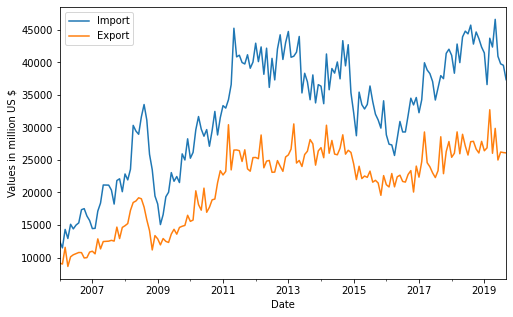

In [14]:
df.plot(figsize = (8,5))
plt.ylabel('Values in million US $')

In [0]:
window  = 12
df['MA_Import']= df['Import'].rolling(window).mean()
df['MA_Export']= df['Export'].rolling(window).mean()

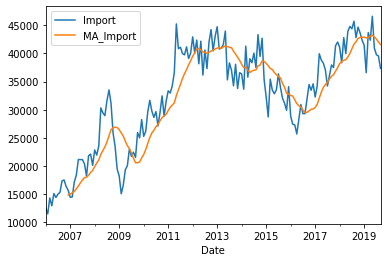

In [16]:
df[['Import', 'MA_Import']].plot()

In [0]:
df['Detrend_Import'] = df['Import']/df['MA_Import']
df['Detrend_Export'] = df['Export']/df['MA_Export']

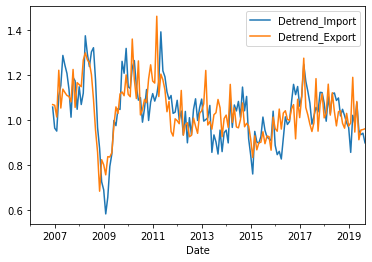

In [18]:
df[['Detrend_Import', 'Detrend_Export']].plot()

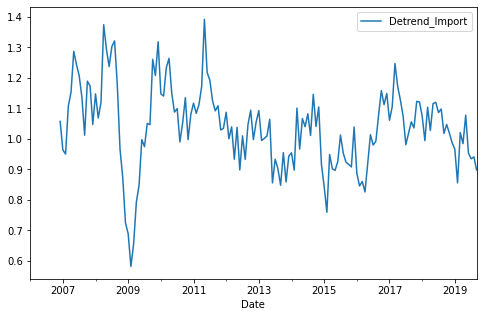

In [19]:
df[['Detrend_Import']].plot(figsize = (8,5))

In [0]:
df.dropna(inplace  = True)

In [21]:
df['Detrend_Import'][0::window]

Date
2006-12-31    1.057162
2007-12-31    1.047333
2008-12-31    0.724712
2009-12-31    1.318101
2010-12-31    1.079663
2011-12-31    1.034593
2012-12-31    1.054959
2013-12-31    0.943187
2014-12-31    0.915949
2015-12-31    1.038917
2016-12-31    1.148642
2017-12-31    1.121332
2018-12-31    0.987672
Freq: 12M, Name: Detrend_Import, dtype: float64

In [22]:
np.nanmean(df['Detrend_Import'][0::window])

1.036324781160308

In [0]:
# from pandas.core.nanops import nanmean as pd_nanmean
period_averages = [np.nanmean(df['Detrend_Import'][i::window], axis=0) for i in range(window)]

In [24]:
period_averages

[1.036324781160308,
 1.0024531033686004,
 0.9444326410371482,
 1.0422147581282046,
 1.0444553055839982,
 1.0982853240279102,
 1.051198994299927,
 1.0611264540087344,
 1.036200582520951,
 1.030368416066475,
 1.0755024704815053,
 1.0336229036576006]

In [0]:
period_norm_averages = period_averages / np.mean(period_averages, axis=0)

In [26]:
period_norm_averages

array([0.99837122, 0.96574003, 0.90984447, 1.00404549, 1.00620398,
       1.05806257, 1.01270069, 1.02226458, 0.99825157, 0.992633  ,
       1.0361141 , 0.9957683 ])

In [0]:
nobs = len(df)
seasonal = np.tile(period_norm_averages.T, nobs // window + 1).T[:nobs]

In [28]:
seasonal

array([0.99837122, 0.96574003, 0.90984447, 1.00404549, 1.00620398,
       1.05806257, 1.01270069, 1.02226458, 0.99825157, 0.992633  ,
       1.0361141 , 0.9957683 , 0.99837122, 0.96574003, 0.90984447,
       1.00404549, 1.00620398, 1.05806257, 1.01270069, 1.02226458,
       0.99825157, 0.992633  , 1.0361141 , 0.9957683 , 0.99837122,
       0.96574003, 0.90984447, 1.00404549, 1.00620398, 1.05806257,
       1.01270069, 1.02226458, 0.99825157, 0.992633  , 1.0361141 ,
       0.9957683 , 0.99837122, 0.96574003, 0.90984447, 1.00404549,
       1.00620398, 1.05806257, 1.01270069, 1.02226458, 0.99825157,
       0.992633  , 1.0361141 , 0.9957683 , 0.99837122, 0.96574003,
       0.90984447, 1.00404549, 1.00620398, 1.05806257, 1.01270069,
       1.02226458, 0.99825157, 0.992633  , 1.0361141 , 0.9957683 ,
       0.99837122, 0.96574003, 0.90984447, 1.00404549, 1.00620398,
       1.05806257, 1.01270069, 1.02226458, 0.99825157, 0.992633  ,
       1.0361141 , 0.9957683 , 0.99837122, 0.96574003, 0.90984

In [29]:
len(seasonal)

154

In [0]:
df['Seasonal_Import'] = seasonal

In [0]:
period_averages = [np.nanmean(df['Detrend_Export'][i::window], axis=0) for i in range(window)]
period_norm_averages = period_averages / np.mean(period_averages, axis=0)
nobs = len(df)
seasonal = np.tile(period_norm_averages.T, nobs // window + 1).T[:nobs]
df['Seasonal_Export'] = seasonal

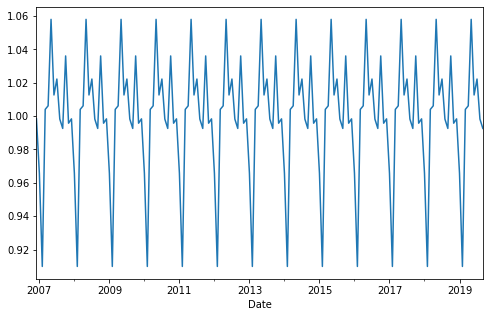

In [32]:
df['Seasonal_Import'].plot(figsize = (8,5))

In [0]:
df['Randomness_Import'] = df['Detrend_Import'] / df['Seasonal_Import']
df['Randomness_Export'] = df['Detrend_Export'] / df['Seasonal_Export']

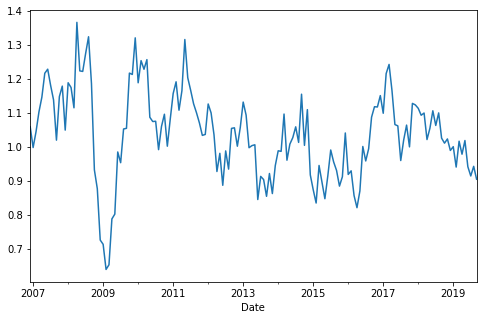

In [34]:
df['Randomness_Import'].plot(figsize = (8,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fefa3f177b8>,
      dtype=object)

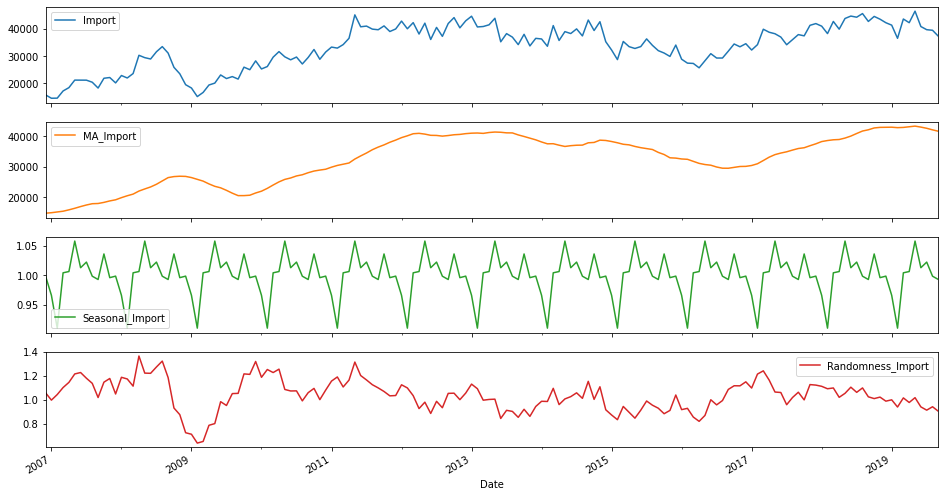

In [35]:
df[['Import', 'MA_Import', 'Seasonal_Import', 'Randomness_Import']].plot(subplots = True, figsize = (16,9))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fefa3ced0f0>,
      dtype=object)

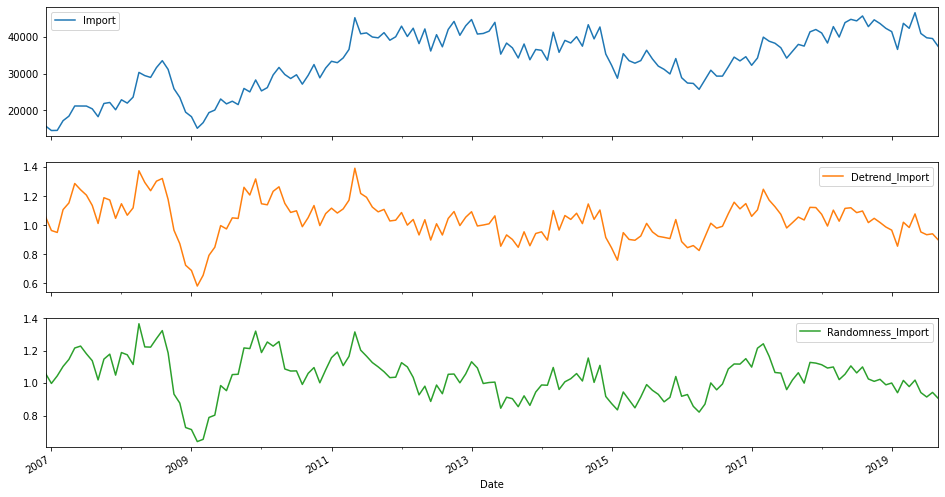

In [36]:
df[['Import', 'Detrend_Import', 'Randomness_Import']].plot(subplots = True, figsize = (16,9))

In [0]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [38]:
adf_test(df['Randomness_Import'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.624905
p-value                          0.000116
#Lags Used                       4.000000
Number of Observations Used    149.000000
Critical Value (1%)             -3.475018
Critical Value (5%)             -2.881141
Critical Value (10%)            -2.577221
dtype: float64


In [39]:
adf_test(df['Randomness_Export'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.768983
p-value                          0.003241
#Lags Used                       6.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64


## Import Forecast

In [0]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df['Randomness_Import'], nlags=12)
lag_pacf = pacf(df['Randomness_Import'], nlags=12, method='ols')

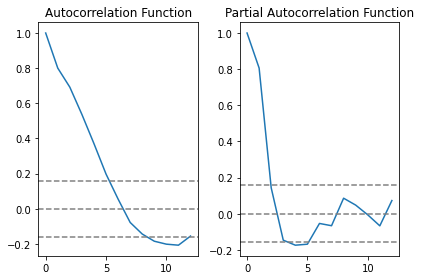

In [41]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [0]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# fit model
model = ARMA(df['Randomness_Import'][:-12], order=(2, 5))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df[:-12]), len(df[:-12]) + 11)



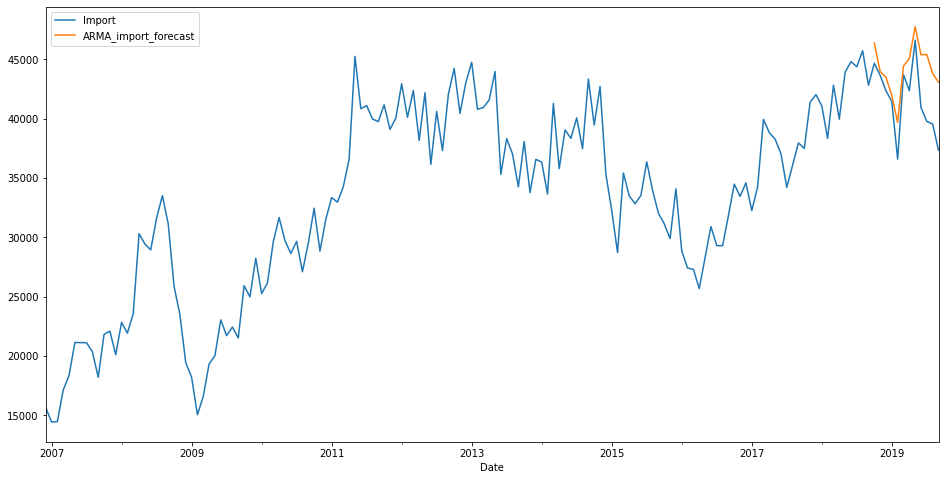

In [43]:
df['ARMA_import_forecast'] = yhat
df['ARMA_import_forecast'] = df['ARMA_import_forecast'] * df['Seasonal_Import'] * df['MA_Import']
df[['Import','ARMA_import_forecast']].plot(figsize = (16,8))

## Export Forecast

In [0]:
lag_acf = acf(df['Randomness_Export'], nlags=12)
lag_pacf = pacf(df['Randomness_Export'], nlags=12, method='ols')

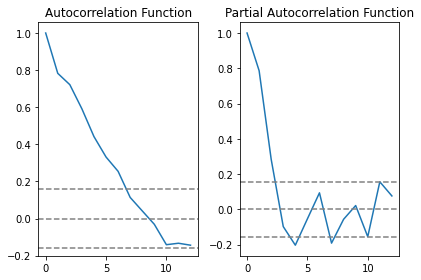

In [45]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [0]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# fit model
model = ARMA(df['Randomness_Export'][:-12], order=(1, 5))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df[:-12]), len(df[:-12]) + 11)



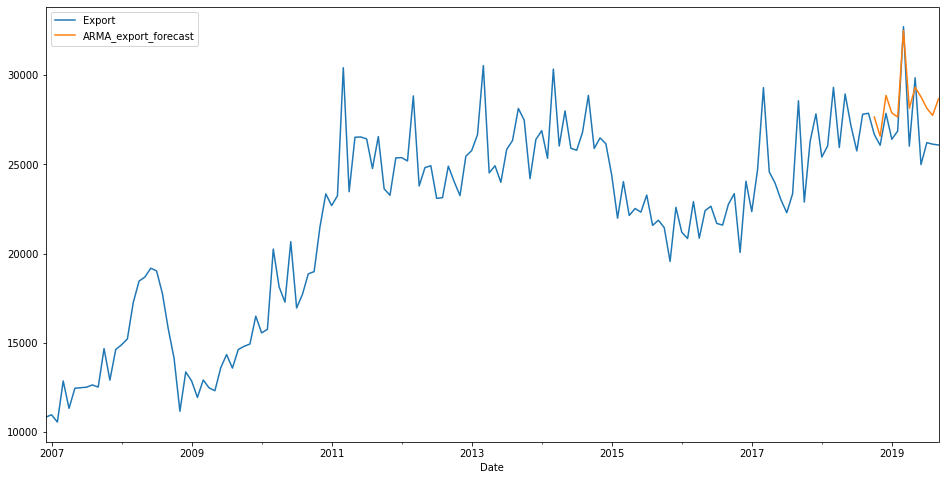

In [47]:
df['ARMA_export_forecast'] = yhat
df['ARMA_export_forecast'] = df['ARMA_export_forecast'] * df['Seasonal_Export'] * df['MA_Export']
df[['Export','ARMA_export_forecast']].plot(figsize = (16,8))

## Error

In [0]:
def rmse(predictions, targets): 
  return np.sqrt(((predictions - targets) ** 2).mean())

In [49]:
rmse(df['Import'][-12:], df['ARMA_import_forecast']), rmse(df['Export'][-12:], df['ARMA_export_forecast'])

(3238.2383278996144, 1762.793579788445)